Step 1: Import Libraries & Load Dataset

In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To display all columns
pd.set_option('display.max_columns', None)

# Step 2: Load the dataset
df = pd.read_csv("HR_Employee_Attrition.csv")
# Step 3: Preview first 5 rows
df.head()


,EmployeeID,Age,Gender,Department,JobRole,MonthlyIncome,JobSatisfaction,WorkLifeBalance,YearsAtCompany,TrainingTimesLastYear,Overtime,Attrition
0,1,50,Female,Finance,Manager,89965,4,2,0,4,No,Yes
1,2,36,Female,Support,Developer,61321,3,1,9,3,No,Yes
2,3,29,Male,Sales,Developer,98297,2,5,6,1,No,No
3,4,42,Male,Finance,Analyst,50426,5,1,9,4,No,No
4,5,40,Male,Development,Developer,42772,5,5,12,1,No,No


Step 2: Basic Dataset Understanding

In [8]:
# Shape of dataset
print("Dataset Shape:", df.shape)

# Info about data types and null values
print("\nDataset Info:")
print(df.info())

# Summary statistics for numerical columns
df.describe()


Dataset Shape: (500, 12)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   EmployeeID             500 non-null    int64 
 1   Age                    500 non-null    int64 
 2   Gender                 500 non-null    object
 3   Department             500 non-null    object
 4   JobRole                500 non-null    object
 5   MonthlyIncome          500 non-null    int64 
 6   JobSatisfaction        500 non-null    int64 
 7   WorkLifeBalance        500 non-null    int64 
 8   YearsAtCompany         500 non-null    int64 
 9   TrainingTimesLastYear  500 non-null    int64 
 10  Overtime               500 non-null    object
 11  Attrition              500 non-null    object
dtypes: int64(7), object(5)
memory usage: 47.0+ KB
None


,EmployeeID,Age,MonthlyIncome,JobSatisfaction,WorkLifeBalance,YearsAtCompany,TrainingTimesLastYear
count,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000
mean,250.500000,41.322000,73284.848000,3.02800,3.050000,6.982000,2.410000
std,144.481833,11.051633,27130.200588,1.38819,1.437927,4.146814,1.750437
min,1.000000,22.000000,25163.000000,1.00000,1.000000,0.000000,0.000000
25%,125.750000,32.000000,51128.750000,2.00000,2.000000,3.000000,1.000000
50%,250.500000,43.000000,73047.500000,3.00000,3.000000,7.000000,2.000000
75%,375.250000,51.000000,96438.750000,4.00000,4.000000,10.250000,4.000000
max,500.000000,59.000000,119880.000000,5.00000,5.000000,14.000000,5.000000


Step 3: Check Missing & Duplicate Values

In [12]:
# Missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Duplicates
print("\nTotal Duplicates:", df.duplicated().sum())



Missing Values per Column:
EmployeeID               0
Age                      0
Gender                   0
Department               0
JobRole                  0
MonthlyIncome            0
JobSatisfaction          0
WorkLifeBalance          0
YearsAtCompany           0
TrainingTimesLastYear    0
Overtime                 0
Attrition                0
dtype: int64

Total Duplicates: 0


Step 4: Convert Data Types for Better Analysis

In [16]:
# Convert categorical columns to 'category' type
categorical_cols = ['Gender', 'Department', 'JobRole', 'Overtime', 'Attrition']
for col in categorical_cols:
    df[col] = df[col].astype('category')

df.dtypes


EmployeeID                  int64
Age                         int64
Gender                   category
Department               category
JobRole                  category
MonthlyIncome               int64
JobSatisfaction             int64
WorkLifeBalance             int64
YearsAtCompany              int64
TrainingTimesLastYear       int64
Overtime                 category
Attrition                category
dtype: object

Step 5: Basic Attrition Analysis

In [20]:
# Count of Attrition
attrition_counts = df['Attrition'].value_counts()
print("\nAttrition Counts:\n", attrition_counts)

# Attrition Rate
attrition_rate = (attrition_counts['Yes'] / len(df)) * 100
print("\nAttrition Rate: {:.2f}%".format(attrition_rate))



Attrition Counts:
 Attrition
No     366
Yes    134
Name: count, dtype: int64

Attrition Rate: 26.80%


Step 6: Visualize Attrition Rate

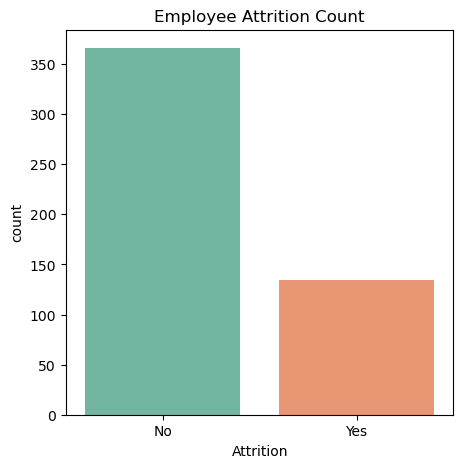

In [26]:
plt.figure(figsize=(5,5))
sns.countplot(x='Attrition', hue='Attrition', data=df, palette='Set2', legend=False)
plt.title("Employee Attrition Count")
plt.show()


Step 7: Attrition by Department

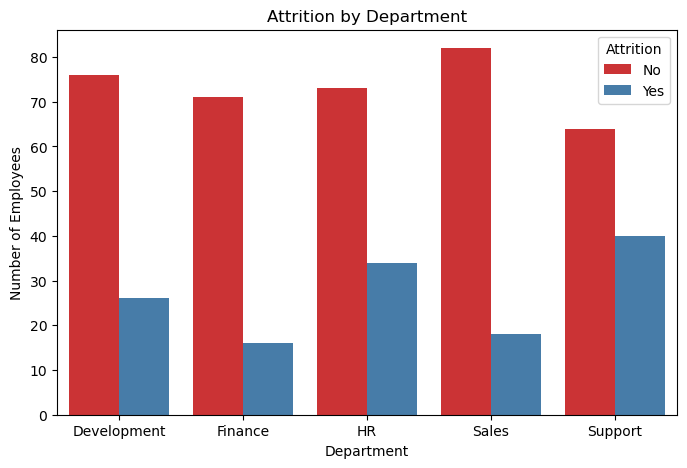

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x='Department', hue='Attrition', data=df, palette='Set1')
plt.title("Attrition by Department")
plt.ylabel("Number of Employees")
plt.show()


Step 8: Attrition vs Salary (Monthly Income)

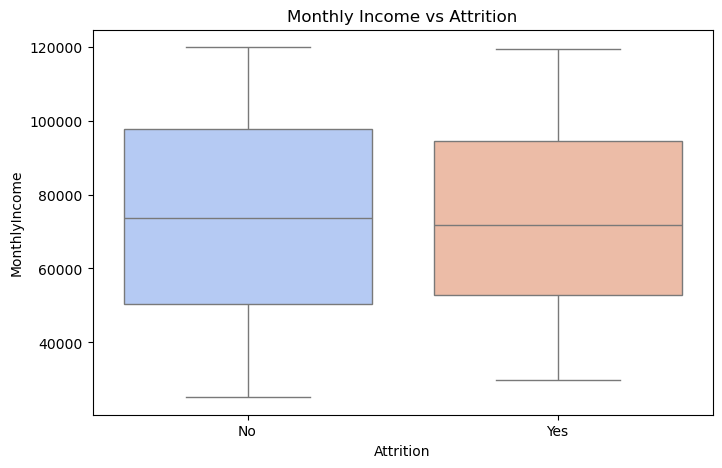

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition', y='MonthlyIncome', hue='Attrition', data=df, palette='coolwarm', dodge=False)
plt.title("Monthly Income vs Attrition")
plt.show()


Step 9: Work-Life Balance & Attrition

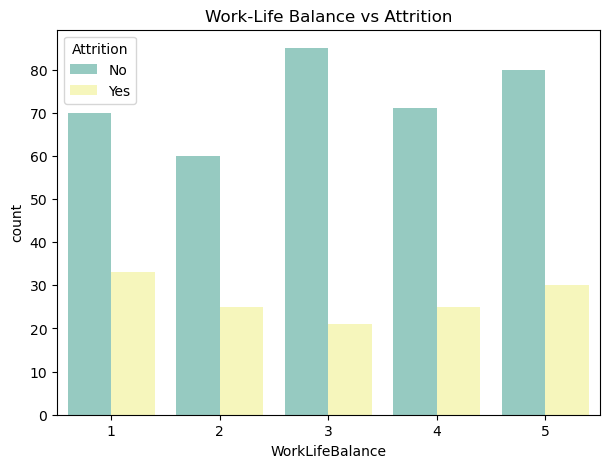

In [40]:
plt.figure(figsize=(7,5))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='Set3')
plt.title("Work-Life Balance vs Attrition")
plt.show()


Step 10: Correlation Heatmap

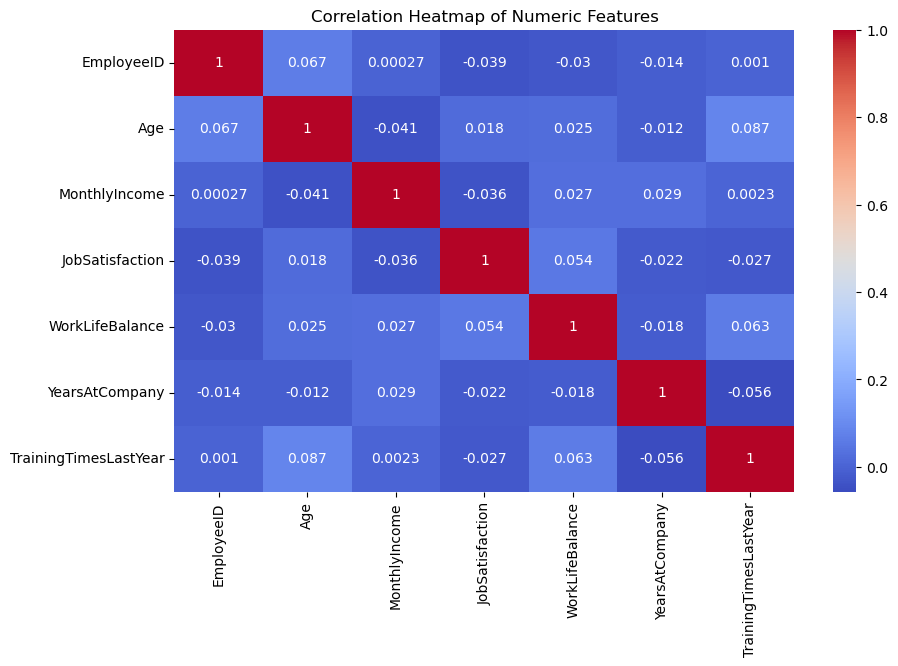

In [46]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Plot the heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


Step 11: Key Insights

In [52]:
# 1. Overall Attrition Rate
attrition_counts = df['Attrition'].value_counts()
attrition_rate = (attrition_counts['Yes'] / len(df)) * 100

# 2. Department-wise Attrition Rate (Warning-free)
dept_attrition = df.groupby('Department', observed=True)['Attrition'].value_counts(normalize=True).unstack() * 100

# 3. Average Salary Comparison (Warning-free)
avg_salary_attrition = df.groupby('Attrition', observed=True)['MonthlyIncome'].mean()

# 4. Work-Life Balance vs Attrition (Warning-free)
wlb_attrition = df.groupby('WorkLifeBalance', observed=True)['Attrition'].value_counts(normalize=True).unstack() * 100

# 5. Experience Impact (Warning-free)
experience_attrition = df.groupby('YearsAtCompany', observed=True)['Attrition'].value_counts(normalize=True).unstack() * 100

# --- Print Key Insights ---
print("\n--- KEY INSIGHTS ---")
print(f"1️⃣ Overall Attrition Rate: {attrition_rate:.2f}%")
print(f"2️⃣ Highest attrition in department: {dept_attrition['Yes'].idxmax()} ({dept_attrition['Yes'].max():.2f}%)")
print(f"3️⃣ Employees with lower salaries leave more (Avg salary who left: {avg_salary_attrition['Yes']:.0f})")
print(f"4️⃣ Poor Work-Life Balance (<=2) has highest attrition rate: {wlb_attrition['Yes'].max():.2f}%")
print(f"5️⃣ Employees with <2 years experience are most likely to resign (Max: {experience_attrition['Yes'].head(2).max():.2f}%)")



--- KEY INSIGHTS ---
1️⃣ Overall Attrition Rate: 26.80%
2️⃣ Highest attrition in department: Support (38.46%)
3️⃣ Employees with lower salaries leave more (Avg salary who left: 73726)
4️⃣ Poor Work-Life Balance (<=2) has highest attrition rate: 32.04%
5️⃣ Employees with <2 years experience are most likely to resign (Max: 33.33%)
